Data source: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

Description:


In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading DATA

In [89]:
df = pd.read_csv('vehicles.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [91]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [92]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [93]:
df['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [94]:
set(df['region_url'].unique())

{'https://abilene.craigslist.org',
 'https://akroncanton.craigslist.org',
 'https://albany.craigslist.org',
 'https://albanyga.craigslist.org',
 'https://albuquerque.craigslist.org',
 'https://allentown.craigslist.org',
 'https://altoona.craigslist.org',
 'https://amarillo.craigslist.org',
 'https://ames.craigslist.org',
 'https://anchorage.craigslist.org',
 'https://annapolis.craigslist.org',
 'https://annarbor.craigslist.org',
 'https://appleton.craigslist.org',
 'https://asheville.craigslist.org',
 'https://ashtabula.craigslist.org',
 'https://athensga.craigslist.org',
 'https://athensohio.craigslist.org',
 'https://atlanta.craigslist.org',
 'https://auburn.craigslist.org',
 'https://augusta.craigslist.org',
 'https://austin.craigslist.org',
 'https://bakersfield.craigslist.org',
 'https://baltimore.craigslist.org',
 'https://batonrouge.craigslist.org',
 'https://battlecreek.craigslist.org',
 'https://beaumont.craigslist.org',
 'https://bellingham.craigslist.org',
 'https://bemidji.

Wygląda na to, że region i region_url są sobie podobne, kolumna region zawiera kilka pozycji, które nazywają się bardzo podobnie, możliwe, że są inaczej zapisane. Możemy wyrzucić kolumnę region i bazować na region_url.

In [95]:
df.drop('region', axis=1, inplace=True)

In [96]:
df.url

0         https://prescott.craigslist.org/cto/d/prescott...
1         https://fayar.craigslist.org/ctd/d/bentonville...
2         https://keys.craigslist.org/cto/d/summerland-k...
3         https://worcester.craigslist.org/cto/d/west-br...
4         https://greensboro.craigslist.org/cto/d/trinit...
                                ...                        
426875    https://wyoming.craigslist.org/ctd/d/atlanta-2...
426876    https://wyoming.craigslist.org/ctd/d/atlanta-2...
426877    https://wyoming.craigslist.org/ctd/d/atlanta-2...
426878    https://wyoming.craigslist.org/ctd/d/atlanta-2...
426879    https://wyoming.craigslist.org/ctd/d/atlanta-2...
Name: url, Length: 426880, dtype: object

Wygląda to, że większość linków z kolumny url wygasła, więc do niczego się nie przyda, wyrzucamy.

In [97]:
df.drop('url', axis=1, inplace=True)

In [98]:
print(f" Year's column missing values: {df.year.isna().sum()}")
print(f" Percent of NaN in year's column: {(df.year.isna().sum()/len(df) * 100).round(2)}")

 Year's column missing values: 1205
 Percent of NaN in year's column: 0.28


In [99]:
#df.year.describe()

In [100]:
#df.drop('year', axis=1, inplace=True)

In [101]:
df.isna().sum()

id                   0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

Kolumny id i VIN są unikalne, więc można jest wyrzucić

In [102]:
df.drop(['id','VIN'], axis=1, inplace=True)

In [103]:
df.isna().sum()

region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [104]:
df.model.value_counts()

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [105]:
df.drop(['county','posting_date'], axis=1, inplace=True)

In [106]:
df.isna().sum()

region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
state                0
lat               6549
long              6549
dtype: int64

In [107]:
df.drop('description', axis=1, inplace=True)

In [108]:
df.head()

,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
0,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN


Manufacturer jest mocno powiązane z model, nie ma sensu trzymać obu zmiennych.

In [109]:
df.drop('manufacturer', axis=1, inplace=True)

In [110]:
df.head()

,region_url,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
0,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN


In [111]:
df.cylinders.describe()

count          249202
unique              8
top       6 cylinders
freq            94169
Name: cylinders, dtype: object

In [112]:
set(df.cylinders.unique())

{'10 cylinders',
 '12 cylinders',
 '3 cylinders',
 '4 cylinders',
 '5 cylinders',
 '6 cylinders',
 '8 cylinders',
 nan,
 'other'}

In [113]:
df['cylinders_num'] = df['cylinders'].str.split(' ', expand=True)[0]

In [114]:
df.head()

,region_url,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long,cylinders_num
0,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [115]:
set(df.cylinders_num.values)

{'10', '12', '3', '4', '5', '6', '8', nan, 'other'}

In [116]:
df.drop('cylinders', axis=1, inplace=True)

In [117]:
df.cylinders_num.value_counts()

6        94169
4        77642
8        72062
5         1712
10        1455
other     1298
3          655
12         209
Name: cylinders_num, dtype: int64

In [118]:
df.cylinders_num.replace(np.NaN, 'other', inplace=True)

In [119]:
df.cylinders_num.value_counts()

other    178976
6         94169
4         77642
8         72062
5          1712
10         1455
3           655
12          209
Name: cylinders_num, dtype: int64

In [120]:
df.condition.value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [121]:
df.condition.isna().sum()

174104

In [122]:
df = df[df.cylinders_num != 'other']

In [123]:
df.drop('image_url', axis=1, inplace=True)

In [124]:
df

,region_url,price,year,model,condition,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,cylinders_num
27,https://auburn.craigslist.org,33590,2014.0,sierra 1500 crew cab slt,good,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,32.590000,-85.480000,8
28,https://auburn.craigslist.org,22590,2010.0,silverado 1500,good,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,32.590000,-85.480000,8
29,https://auburn.craigslist.org,39590,2020.0,silverado 1500 crew,good,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,32.590000,-85.480000,8
30,https://auburn.craigslist.org,30990,2017.0,tundra double cab sr,good,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,32.590000,-85.480000,8
31,https://auburn.craigslist.org,15000,2013.0,f-150 xlt,excellent,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.518900,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426866,https://wyoming.craigslist.org,32990,2016.0,qx80 sport utility 4d,good,gas,55612.0,clean,automatic,rwd,NaN,other,black,wy,33.779214,-84.411811,8
426868,https://wyoming.craigslist.org,0,2010.0,venza,excellent,gas,155000.0,clean,automatic,4wd,NaN,NaN,blue,wy,40.114685,-104.971971,6
426874,https://wyoming.craigslist.org,33590,2018.0,gs 350 sedan 4d,good,gas,30814.0,clean,automatic,rwd,NaN,sedan,white,wy,33.779214,-84.411811,6
426875,https://wyoming.craigslist.org,23590,2019.0,maxima s sedan 4d,good,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy,33.786500,-84.445400,6


<AxesSubplot:>

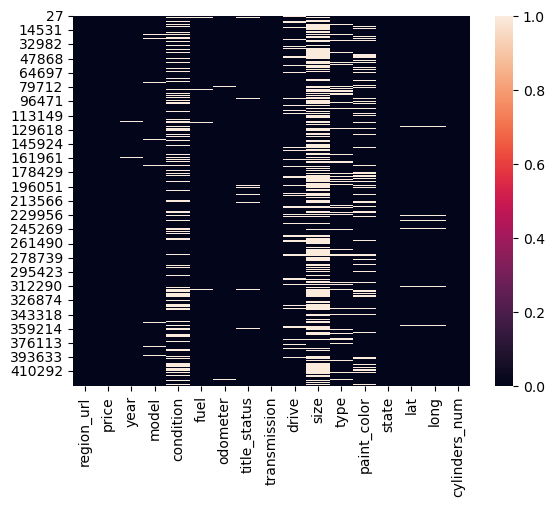

In [125]:
sns.heatmap(df.isna())

In [126]:
df.drop('condition', axis=1, inplace=True)

In [127]:
df.drop('paint_color', axis=1, inplace=True)

<AxesSubplot:>

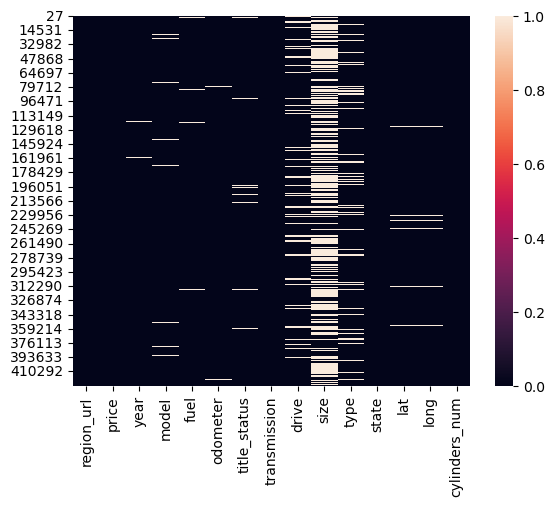

In [128]:
sns.heatmap(df.isna())

In [129]:
df.drive.isna().sum()

35021

In [130]:
df.drop('drive', axis=1, inplace=True)

<AxesSubplot:>

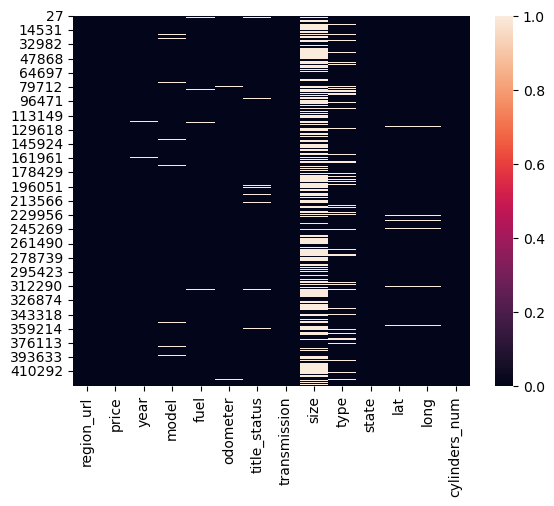

In [131]:
sns.heatmap(df.isna())

In [132]:
df.dropna(inplace=True)

<AxesSubplot:>

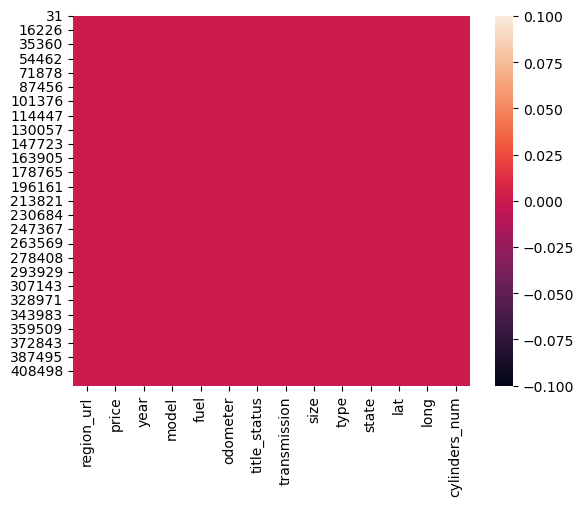

In [133]:
sns.heatmap(df.isna())

In [134]:
location = []
for i in df['region_url']:
    location.append(i.split(sep='.')[0][8:])

In [135]:
df['region'] = location
df.drop('region_url', axis=1, inplace=True)
df.head()


,price,year,model,fuel,odometer,title_status,transmission,size,type,state,lat,long,cylinders_num,region
31,15000,2013.0,f-150 xlt,gas,128000.0,clean,automatic,full-size,truck,al,32.592000,-85.51890,6,auburn
55,19900,2004.0,f250 super duty,diesel,88000.0,clean,automatic,full-size,pickup,al,32.547500,-85.46820,8,auburn
59,14000,2012.0,odyssey,gas,95000.0,clean,automatic,full-size,mini-van,al,32.628739,-85.46182,6,auburn
65,22500,2001.0,f450,diesel,144700.0,clean,manual,full-size,truck,al,32.630400,-85.40160,8,auburn
73,15000,2017.0,charger rt 4dr sedan,gas,90000.0,rebuilt,automatic,mid-size,sedan,al,32.822400,-85.77040,8,auburn


In [136]:
set(df.title_status.unique())

{'clean', 'lien', 'missing', 'parts only', 'rebuilt', 'salvage'}

# Exploratory Data Analysis

In [137]:
!pip install chart_studio

In [138]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [139]:
df['STATE'] = df['state'].str.upper()

In [140]:
df

,price,year,model,fuel,odometer,title_status,transmission,size,type,state,lat,long,cylinders_num,region,STATE
31,15000,2013.0,f-150 xlt,gas,128000.0,clean,automatic,full-size,truck,al,32.592000,-85.518900,6,auburn,AL
55,19900,2004.0,f250 super duty,diesel,88000.0,clean,automatic,full-size,pickup,al,32.547500,-85.468200,8,auburn,AL
59,14000,2012.0,odyssey,gas,95000.0,clean,automatic,full-size,mini-van,al,32.628739,-85.461820,6,auburn,AL
65,22500,2001.0,f450,diesel,144700.0,clean,manual,full-size,truck,al,32.630400,-85.401600,8,auburn,AL
73,15000,2017.0,charger rt 4dr sedan,gas,90000.0,rebuilt,automatic,mid-size,sedan,al,32.822400,-85.770400,8,auburn,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426809,18000,1990.0,gand wagoneer,gas,114400.0,clean,automatic,full-size,SUV,wy,43.452800,-110.739300,8,wyoming,WY
426831,9800,1985.0,300zx coupe with t-tops,gas,115000.0,clean,automatic,sub-compact,hatchback,wy,41.143700,-104.796200,6,wyoming,WY
426833,6800,1997.0,xk8 convertible,gas,69550.0,clean,automatic,compact,convertible,wy,43.642930,-108.222976,8,wyoming,WY
426836,0,2018.0,2500,diesel,20492.0,clean,automatic,full-size,truck,wy,45.082436,-94.334686,6,wyoming,WY


In [141]:
df.drop('state', axis=1, inplace=True)

In [142]:
df.groupby(by=['STATE']).count()['model']

STATE
AK      701
AL     1212
AR      766
AZ     2059
CA    10378
CO     2827
CT     1106
DC      601
DE      272
FL     8492
GA     1459
HI      494
IA     1980
ID     1949
IL     2229
IN     1401
KS     1691
KY     1117
LA      621
MA     1983
MD      944
ME      716
MI     3287
MN     2236
MO      979
MS      244
MT     1012
NC     3322
ND      244
NE      292
NH      617
NJ     2182
NM      954
NV     1034
NY     4914
OH     4830
OK     1895
OR     2496
PA     3135
RI      799
SC     1431
SD      359
TN     2658
TX     6328
UT      263
VA     2365
VT     1049
WA     1299
WI     2862
WV      166
WY      154
Name: model, dtype: int64

In [143]:
states = df['STATE'].unique()

data = dict(type = 'choropleth',
            locations = states,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= states,
            z=df.groupby(by=['STATE']).count()['model'],
            colorbar = {'title':'Sold cars'})

In [144]:
layout = dict(geo = {'scope':'usa'})

In [145]:
choromap = go.Figure(data = [data],layout = layout)

In [146]:
iplot(choromap)

In [147]:
df

,price,year,model,fuel,odometer,title_status,transmission,size,type,lat,long,cylinders_num,region,STATE
31,15000,2013.0,f-150 xlt,gas,128000.0,clean,automatic,full-size,truck,32.592000,-85.518900,6,auburn,AL
55,19900,2004.0,f250 super duty,diesel,88000.0,clean,automatic,full-size,pickup,32.547500,-85.468200,8,auburn,AL
59,14000,2012.0,odyssey,gas,95000.0,clean,automatic,full-size,mini-van,32.628739,-85.461820,6,auburn,AL
65,22500,2001.0,f450,diesel,144700.0,clean,manual,full-size,truck,32.630400,-85.401600,8,auburn,AL
73,15000,2017.0,charger rt 4dr sedan,gas,90000.0,rebuilt,automatic,mid-size,sedan,32.822400,-85.770400,8,auburn,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426809,18000,1990.0,gand wagoneer,gas,114400.0,clean,automatic,full-size,SUV,43.452800,-110.739300,8,wyoming,WY
426831,9800,1985.0,300zx coupe with t-tops,gas,115000.0,clean,automatic,sub-compact,hatchback,41.143700,-104.796200,6,wyoming,WY
426833,6800,1997.0,xk8 convertible,gas,69550.0,clean,automatic,compact,convertible,43.642930,-108.222976,8,wyoming,WY
426836,0,2018.0,2500,diesel,20492.0,clean,automatic,full-size,truck,45.082436,-94.334686,6,wyoming,WY


In [148]:
df['model'].value_counts

<bound method IndexOpsMixin.value_counts of 31                      f-150 xlt
55                f250 super duty
59                        odyssey
65                           f450
73           charger rt 4dr sedan
                   ...           
426809              gand wagoneer
426831    300zx coupe with t-tops
426833            xk8 convertible
426836                       2500
426838    Paige Glenbrook Touring
Name: model, Length: 98404, dtype: object>

In [149]:
#df2 = pd.get_dummies(df, columns=['model'])

In [150]:
#df2

In [151]:
#df2.shape

In [152]:
models_value_counts = df['model'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [153]:
models_value_counts

,unique_values,counts
0,f-150,2022
1,silverado 1500,1749
2,1500,989
3,camry,942
4,accord,936
...,...,...
12354,plymouth fury 1,1
12355,serbring convt,1
12356,PETERBILT 330 RV HAULER,1
12357,KENWORTH T300,1


In [154]:
models_value_counts['counts'] = models_value_counts['counts'].astype('int')
#models_value_counts['counts' < 50].count()

In [155]:
models_value_counts[models_value_counts['counts'] < 50].count()

unique_values    12051
counts           12051
dtype: int64

In [156]:
len(models_value_counts)

12359

In [157]:
counts = df['model'].value_counts()

In [249]:
#Usuwam "egoztyczne" samochody, których próbki są stosunkowo małe - tym samym znacznie zmniejszam ilość modeli w zbiorze. Pozostaną te popularniejsze.
df2 = df[~df['model'].isin(counts[counts > 50].index)]

In [250]:
len(df2)

43673

In [251]:
df2

,price,year,model,fuel,odometer,title_status,transmission,size,type,lat,long,cylinders_num,region,STATE
65,22500,2001.0,f450,diesel,144700.0,clean,manual,full-size,truck,32.630400,-85.401600,8,auburn,AL
73,15000,2017.0,charger rt 4dr sedan,gas,90000.0,rebuilt,automatic,mid-size,sedan,32.822400,-85.770400,8,auburn,AL
122,6800,2005.0,blue bird bus,diesel,180000.0,clean,automatic,full-size,bus,32.833700,-85.119700,6,auburn,AL
137,2500,1966.0,1966 C-30 1 ton,gas,47000.0,clean,manual,full-size,pickup,32.416900,-85.709400,6,auburn,AL
177,22950,2014.0,f150 supercrew cab xlt,gas,166380.0,clean,automatic,full-size,truck,33.384664,-86.737847,8,bham,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,15999,2018.0,"cruze, lt",gas,36465.0,clean,automatic,mid-size,sedan,41.138284,-104.784799,4,wyoming,WY
426809,18000,1990.0,gand wagoneer,gas,114400.0,clean,automatic,full-size,SUV,43.452800,-110.739300,8,wyoming,WY
426831,9800,1985.0,300zx coupe with t-tops,gas,115000.0,clean,automatic,sub-compact,hatchback,41.143700,-104.796200,6,wyoming,WY
426833,6800,1997.0,xk8 convertible,gas,69550.0,clean,automatic,compact,convertible,43.642930,-108.222976,8,wyoming,WY


In [252]:
#Na potrzeby trenowania robię kopię df i usuwam niepotrzebne kolumny
df_to_train = df2.copy()

In [253]:
df_to_train.drop(['lat', 'region', 'STATE', 'long'], axis=1, inplace = True)

In [254]:
df_to_train.columns

Index(['price', 'year', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'size', 'type', 'cylinders_num'],
      dtype='object')

In [255]:
df_to_train

,price,year,model,fuel,odometer,title_status,transmission,size,type,cylinders_num
65,22500,2001.0,f450,diesel,144700.0,clean,manual,full-size,truck,8
73,15000,2017.0,charger rt 4dr sedan,gas,90000.0,rebuilt,automatic,mid-size,sedan,8
122,6800,2005.0,blue bird bus,diesel,180000.0,clean,automatic,full-size,bus,6
137,2500,1966.0,1966 C-30 1 ton,gas,47000.0,clean,manual,full-size,pickup,6
177,22950,2014.0,f150 supercrew cab xlt,gas,166380.0,clean,automatic,full-size,truck,8
...,...,...,...,...,...,...,...,...,...,...
426793,15999,2018.0,"cruze, lt",gas,36465.0,clean,automatic,mid-size,sedan,4
426809,18000,1990.0,gand wagoneer,gas,114400.0,clean,automatic,full-size,SUV,8
426831,9800,1985.0,300zx coupe with t-tops,gas,115000.0,clean,automatic,sub-compact,hatchback,6
426833,6800,1997.0,xk8 convertible,gas,69550.0,clean,automatic,compact,convertible,8


In [256]:
!pip install scikit-learn

In [257]:
#Dla wygody przesuwam kolumnę price (target)
column_to_move = df_to_train.pop("price")
df_to_train.insert(9, "price", column_to_move)

In [258]:
df_to_train

,year,model,fuel,odometer,title_status,transmission,size,type,cylinders_num,price
65,2001.0,f450,diesel,144700.0,clean,manual,full-size,truck,8,22500
73,2017.0,charger rt 4dr sedan,gas,90000.0,rebuilt,automatic,mid-size,sedan,8,15000
122,2005.0,blue bird bus,diesel,180000.0,clean,automatic,full-size,bus,6,6800
137,1966.0,1966 C-30 1 ton,gas,47000.0,clean,manual,full-size,pickup,6,2500
177,2014.0,f150 supercrew cab xlt,gas,166380.0,clean,automatic,full-size,truck,8,22950
...,...,...,...,...,...,...,...,...,...,...
426793,2018.0,"cruze, lt",gas,36465.0,clean,automatic,mid-size,sedan,4,15999
426809,1990.0,gand wagoneer,gas,114400.0,clean,automatic,full-size,SUV,8,18000
426831,1985.0,300zx coupe with t-tops,gas,115000.0,clean,automatic,sub-compact,hatchback,6,9800
426833,1997.0,xk8 convertible,gas,69550.0,clean,automatic,compact,convertible,8,6800


In [259]:
#Kodowanie atrybutów kategorycznych 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df_to_train[["fuel", "title_status", "transmission", "type", "size", "cylinders_num"]])


df_to_train[["fuel", "title_status", "transmission", "type", "size", "cylinders_num"]]=enc.transform(df_to_train[["fuel", "title_status", "transmission","type", "size", "cylinders_num"]])

In [260]:
df_to_train

,year,model,fuel,odometer,title_status,transmission,size,type,cylinders_num,price
65,2001.0,f450,0.0,144700.0,0.0,1.0,1.0,10.0,6.0,22500
73,2017.0,charger rt 4dr sedan,2.0,90000.0,4.0,0.0,2.0,9.0,6.0,15000
122,2005.0,blue bird bus,0.0,180000.0,0.0,0.0,1.0,1.0,5.0,6800
137,1966.0,1966 C-30 1 ton,2.0,47000.0,0.0,1.0,1.0,8.0,5.0,2500
177,2014.0,f150 supercrew cab xlt,2.0,166380.0,0.0,0.0,1.0,10.0,6.0,22950
...,...,...,...,...,...,...,...,...,...,...
426793,2018.0,"cruze, lt",2.0,36465.0,0.0,0.0,2.0,9.0,3.0,15999
426809,1990.0,gand wagoneer,2.0,114400.0,0.0,0.0,1.0,0.0,6.0,18000
426831,1985.0,300zx coupe with t-tops,2.0,115000.0,0.0,0.0,3.0,4.0,5.0,9800
426833,1997.0,xk8 convertible,2.0,69550.0,0.0,0.0,0.0,2.0,6.0,6800


In [261]:
#dummy value na model
df_to_train = pd.get_dummies(df_to_train, columns=['model'])

In [262]:
df_to_train.shape

(43673, 12066)

In [263]:
df_to_train

,year,fuel,odometer,title_status,transmission,size,type,cylinders_num,price,"model_""t""",...,model_z4 sdrive28i,model_z4 sdrive35i,model_z4 sdrive35is,model_z71,model_zdx,model_zephyr,model_zr2 sonoma,model_zx2,model_♿ vmi,model_𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350
65,2001.0,0.0,144700.0,0.0,1.0,1.0,10.0,6.0,22500,0,...,0,0,0,0,0,0,0,0,0,0
73,2017.0,2.0,90000.0,4.0,0.0,2.0,9.0,6.0,15000,0,...,0,0,0,0,0,0,0,0,0,0
122,2005.0,0.0,180000.0,0.0,0.0,1.0,1.0,5.0,6800,0,...,0,0,0,0,0,0,0,0,0,0
137,1966.0,2.0,47000.0,0.0,1.0,1.0,8.0,5.0,2500,0,...,0,0,0,0,0,0,0,0,0,0
177,2014.0,2.0,166380.0,0.0,0.0,1.0,10.0,6.0,22950,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,2018.0,2.0,36465.0,0.0,0.0,2.0,9.0,3.0,15999,0,...,0,0,0,0,0,0,0,0,0,0
426809,1990.0,2.0,114400.0,0.0,0.0,1.0,0.0,6.0,18000,0,...,0,0,0,0,0,0,0,0,0,0
426831,1985.0,2.0,115000.0,0.0,0.0,3.0,4.0,5.0,9800,0,...,0,0,0,0,0,0,0,0,0,0
426833,1997.0,2.0,69550.0,0.0,0.0,0.0,2.0,6.0,6800,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
#Dla wygody przesuwam kolumnę price (target)
column_to_move = df_to_train.pop("price")
df_to_train['price'] = column_to_move


In [265]:
df_to_train

,year,fuel,odometer,title_status,transmission,size,type,cylinders_num,"model_""t""",model_%,...,model_z4 sdrive35i,model_z4 sdrive35is,model_z71,model_zdx,model_zephyr,model_zr2 sonoma,model_zx2,model_♿ vmi,model_𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350,price
65,2001.0,0.0,144700.0,0.0,1.0,1.0,10.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,22500
73,2017.0,2.0,90000.0,4.0,0.0,2.0,9.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,15000
122,2005.0,0.0,180000.0,0.0,0.0,1.0,1.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,6800
137,1966.0,2.0,47000.0,0.0,1.0,1.0,8.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,2500
177,2014.0,2.0,166380.0,0.0,0.0,1.0,10.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,22950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,2018.0,2.0,36465.0,0.0,0.0,2.0,9.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,15999
426809,1990.0,2.0,114400.0,0.0,0.0,1.0,0.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,18000
426831,1985.0,2.0,115000.0,0.0,0.0,3.0,4.0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,9800
426833,1997.0,2.0,69550.0,0.0,0.0,0.0,2.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,6800


In [266]:
#Podział na zbiór testowy i treningowy
from sklearn.model_selection import train_test_split
df_to_train.dropna(inplace=True)
df_to_train.dropna(inplace=True)
train, test = train_test_split(df_to_train, test_size=0.3)

X=train.iloc[:,:-1]
y=train.iloc[:,-1]

X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [267]:
y_test

169081     8495
238518     7000
254896     2000
172187     6500
165552    18750
          ...  
297612     4995
21005         0
273321    18000
49347         0
176481    29990
Name: price, Length: 13102, dtype: int64

In [268]:
y

264109    19995
82846     13000
91701     29990
392023     4995
409461    42995
          ...  
180950    25000
215034    18995
368069    31918
122756     4800
324731      999
Name: price, Length: 30571, dtype: int64

In [269]:
#Test regresji liniowej
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.05889291093783844

In [270]:
# Print the Intercept:
print('intercept:', reg.intercept_)

# Print the Slope:
print('slope:', reg.coef_) 

# Predict a Response and print it:
y_pred = reg.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

intercept: -273860257639.72128
slope: [-2.67520678e+04  3.32925874e+04  3.22019174e-02 ...  2.73914106e+11
  2.73914145e+11  0.00000000e+00]
Predicted response:
[-7.81791714e+03  4.60702967e+04 -2.73913976e+11 ... -6.77347550e+04
  2.86350240e+05  5.68313697e+05]


In [271]:
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))

RMS: 3486650927649.9443 


In [272]:
type(y_pred)

numpy.ndarray

In [273]:
type(y_test)

pandas.core.series.Series

In [274]:
compared_y = pd.DataFrame(y_pred, columns = ['y_pred'])

In [275]:
compared_y['y_test'] = y_test

In [276]:
compared_y

,y_pred,y_test
0,-7.817917e+03,NaN
1,4.607030e+04,NaN
2,-2.739140e+11,NaN
3,9.051052e+04,NaN
4,-2.739143e+11,NaN
...,...,...
13097,1.934933e+05,NaN
13098,4.569797e+04,NaN
13099,-6.773476e+04,NaN
13100,2.863502e+05,NaN
